# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import plotly.express as px
from datetime import datetime
sns.set_style('darkgrid')
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [2]:
custom_d = pd.read_csv('olist_customers_dataset.csv')
geo_d = pd.read_csv('olist_geolocation_dataset.csv')
order_i=pd.read_csv('olist_order_items_dataset.csv')
order_p=pd.read_csv('olist_order_payments_dataset.csv')
order_r=pd.read_csv('olist_order_reviews_dataset.csv')
order_o=pd.read_csv('olist_orders_dataset.csv')
order_pr=pd.read_csv('olist_products_dataset.csv')
order_s=pd.read_csv('olist_sellers_dataset.csv')
prod_cat=pd.read_csv('product_category_name_translation.csv')


In [3]:
prod_cat.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [4]:
dataframes = {
 'Customers': custom_d,
 'Geolocation': geo_d,
 'Orders': order_o,
 'Items': order_i,
 'Payments': order_p,
 'Reviews': order_r,
 'Products': order_pr,
 'Sellers': order_s
}


In [5]:
for name, df in dataframes.items():
 print(f'{name}: {len(df.columns)} columns')
 print(f'{list(df.columns)}\n')

Customers: 5 columns
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Geolocation: 5 columns
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Orders: 8 columns
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Items: 7 columns
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Payments: 5 columns
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Reviews: 7 columns
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Products: 9 columns
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty

# MERGING AND CLEANING

In [6]:
for name, df in dataframes.items():
 print(f'{name:<12}- {df.isnull().any().any()}')

Customers   - False
Geolocation - False
Orders      - True
Items       - False
Payments    - False
Reviews     - True
Products    - True
Sellers     - False


In [7]:
for name, df in dataframes.items():
 if df.isnull().any().any():
     print(f'Dataset: {name}\n')
     print(f'{df.isnull().sum()}\n')

Dataset: Orders

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dataset: Reviews

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dataset: Products

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64



In [8]:
order_o.drop(['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'],axis=1,inplace=True)
order_r.drop(['review_comment_title','review_comment_message'],axis=1,inplace=True)
order_pr.drop(['product_name_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','product_description_lenght'],axis=1,inplace=True)

In [9]:
for name, df in dataframes.items():
 print(f'{name:<12}- {df.isnull().any().any()}')

Customers   - False
Geolocation - False
Orders      - False
Items       - False
Payments    - False
Reviews     - False
Products    - True
Sellers     - False


In [10]:
for name, df in dataframes.items():
 if df.isnull().any().any():
     print(f'Dataset: {name}\n')
     print(f'{df.duplicated().sum()}\n')

Dataset: Products

0



In [11]:
from functools import reduce

In [12]:
list1=[custom_d,order_o]
gmrl1=reduce(lambda left,right:pd.merge(left,right,on=['customer_id'],how='outer'),list1)

In [13]:
list2=[order_i,order_p,order_r]
gmrl2=reduce(lambda left,right:pd.merge(left,right,on=['order_id'],how='outer'),list2)

In [14]:
gmrl1.shape,custom_d.shape,order_o.shape

((99441, 9), (99441, 5), (99441, 5))

In [15]:
gmrl2.shape,order_i.shape,order_p.shape,order_r.shape

((119151, 15), (112650, 7), (103886, 5), (100000, 5))

In [16]:
order_i.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [17]:
order_p.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [18]:
order_r.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [19]:
gmrl2.isna().sum()

order_id                     0
order_item_id              833
product_id                 833
seller_id                  833
shipping_limit_date        833
price                      833
freight_value              833
payment_sequential           3
payment_type                 3
payment_installments         3
payment_value                3
review_id                    0
review_score                 0
review_creation_date         0
review_answer_timestamp      0
dtype: int64

In [1]:
gmrl2=gmrl2.dropna()

NameError: name 'gmrl2' is not defined

In [21]:
gmrl2.isna().sum()

order_id                   0
order_item_id              0
product_id                 0
seller_id                  0
shipping_limit_date        0
price                      0
freight_value              0
payment_sequential         0
payment_type               0
payment_installments       0
payment_value              0
review_id                  0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [22]:
gmrl1.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

In [23]:
order_s.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [24]:
list3=pd.merge(gmrl2,order_s,on='seller_id')

In [25]:
list4=pd.merge(list3,order_pr,on='product_id')

In [26]:
list5=pd.merge(list4,prod_cat,on='product_category_name')

In [27]:
list6=[gmrl1,list5]
Olist=reduce(lambda left,right:pd.merge(left,right,on=['order_id'],how='outer'),list6)

In [28]:
Olist.duplicated().sum()

0

In [29]:
Olist.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
order_item_id                    2186
product_id                       2186
seller_id                        2186
shipping_limit_date              2186
price                            2186
freight_value                    2186
payment_sequential               2186
payment_type                     2186
payment_installments             2186
payment_value                    2186
review_id                        2186
review_score                     2186
review_creation_date             2186
review_answer_timestamp          2186
seller_zip_code_prefix           2186
seller_city                      2186
seller_state                     2186
product_cate

In [30]:
Olist=Olist.dropna()

In [31]:
Olist.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
product_category_name            0
product_category_name_english    0
dtype: int64

In [32]:
Olist.shape

(116581, 28)

In [33]:
Olist.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered          5/16/2017 15:05   
1  29150127e6685892b6eab3eec79f59c7    delivered          1/12/2018 20:48   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered          5/19/2018 16:07   
3  951670f92359f4fe4a63112aa7306eba    delivered          3/13/2018 16:06   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered           7/29/2018 9:51   

  order_estimated_delivery_date  order_item_id  \
0                 6/5/2017 0:00            1.0   
1                 2/6/2018 0:00            1.0   
2                6/13/2018 0:00            1.0   
3                4/10/2018 0:00            1.0   
4                8/15/2018 0:00            1.0   

                         product_id                         seller_id  \
0  a9516a079e37a9c9c36b9b78b10169e8  7c67e1448b00f6e969d365cea6b010ab   
1  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
2  bd07b66896d6f1494f5b86251848ced7  7c67e1448b00f6e969d365cea6b010ab   
3  a5647c44af977b148e0a3a4751a09e2e  7c67e1448b00f6e969d365cea6b010ab   
4  9391a573abe00141c56e38d84d7d5b3b  4a3ca9315b744ce9f8e9374361493884   

  shipping_limit_date   price  freight_value  payment_sequential payment_type  \
0     5/22/2017 15:22  124.99          21.88                 1.0  credit_card   
1     1/18/2018 20:58  289.00          46.48                 1.0  credit_card   
2      6/5/2018 16:19  139.94          17.79                 1.0  credit_card   
3     3/27/2018 16:31  149.94          23.36                 1.0  credit_card   
4     7/31/2018 10:10  230.00          22.25                 1.0  credit_card   

   payment_installments  payment_value                         review_id  \
0                   2.0         146.87  88b8b52d46df026a9d1ad2136a59b30b   
1                   8.0         335.48  02fc48a9efa3e3d0f1a8ea26507eeec3   
2                   7.0         157.73  5ad6695d76ee186dc473c42706984d87   
3                   1.0         173.30  059a801bb31f6aab2266e672cab87bc5   
4                   8.0         252.25  8490879d58d6c5d7773f2739a03f089a   

   review_score review_creation_date review_answer_timestamp  \
0           4.0       5/26/2017 0:00         5/30/2017 22:34   
1           5.0       1/30/2018 0:00         2/10/2018 22:43   
2           5.0       6/15/2018 0:00         6/15/2018 12:10   
3           5.0       3/29/2018 0:00          4/2/2018 18:36   
4           5.0       8/10/2018 0:00          8/17/2018 1:59   

   seller_zip_code_prefix      seller_city seller_state  \
0                  8577.0  itaquaquecetuba           SP   
1                 88303.0           itajai           SC   
2                  8577.0  itaquaquecetuba           SP   
3                  8577.0  itaquaquecetuba           SP   
4                 14940.0         ibitinga           SP   

   product_category_name product_category_name_english  
0      moveis_escritorio              office_furniture  
1  utilidades_domesticas                    housewares  
2      moveis_escritorio              office_furniture  
3      moveis_escritorio              office_furniture 

In [34]:
Olist.tail()

customer_id                customer_unique_id  \
118762  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
118763  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
118764  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
118765  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
118766  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

        customer_zip_code_prefix    customer_city customer_state  \
118762                      3937        sao paulo             SP   
118763                      6764  taboao da serra             SP   
118764                     60115        fortaleza             CE   
118765                     92120           canoas             RS   
118766                      6703            cotia             SP   

                                order_id order_status  \
118762  6760e20addcf0121e9d58f2f1ff14298    delivered   
118763  9ec0c8947d973db4f4e8dcf1fbfa8f1b    delivered   
118764  fed4434add09a6f332ea398efd656a5c    delivered   
118765  e31ec91cea1ecf97797787471f98a8c2    delivered   
118766  28db69209a75e59f20ccbb5c36a20b90    delivered   

       order_purchase_timestamp order_estimated_delivery_date  order_item_id  \
118762           4/7/2018 15:48                4/25/2018 0:00            1.0   
118763            4/4/2018 8:20                4/20/2018 0:00            1.0   
118764           4/8/2018 20:11                 5/2/2018 0:00            1.0   
118765          11/3/2017 21:08                12/5/2017 0:00            1.0   
118766         12/19/2017 14:27                 1/8/2018 0:00            1.0   

                              product_id                         seller_id  \
118762  ccb4503d9d43d245d3b295d0544f988b  527801b552d0077ffd170872eb49683b   
118763  9ede6b0570a75a4b9de4f383329f99ee  3fd1e727ba94cfe122d165e176ce7967   
118764  7a5d2e1e131a860ae7d18f6fffa9d689  d9e7e7778b32987280a6f2cb9a39c57d   
118765  f819f0c84a64f02d3a5606ca95edd272  4869f7a5dfa277a7dca6462dcf3b52b2   
118766  017692475c1c954ff597feda05131d73  3c7c4a49ec3c6550809089c6a2ca9370   

       shipping_limit_date   price  freight_value  payment_sequential  \
118762     4/12/2018 16:08   74.90          13.88                 1.0   
118763      4/10/2018 8:35  114.90          14.16                 1.0   
118764     4/12/2018 20:30   37.00          19.04                 1.0   
118765     11/9/2017 21:15  689.00          22.07                 1.0   
118766    12/26/2017 18:50   13.99           7.78                 1.0   

       payment_type  payment_installments  payment_value  \
118762  credit_card                   6.0          88.78   
118763  credit_card                   3.0         129.06   
118764  credit_card                   5.0          56.04   
118765  credit_card                   2.0         711.07   
118766  credit_card                   1.0          21.77   

                               review_id  review_score review_creation_date  \
118762  36e2cdbaa9f639b57c53b37ac798fee8           4.0       4/14/2018 0:00   
118763  b273b431c3aedb4eed18643309652940           5.0       4/12/2018 0:00   
118764  fa4f16891e6b2edd1354668d07f5648b           1.0        5/4/2018 0:00   
118765  0bcdc9e450ea500811a8d39ee993cd47           5.0      11/17/2017 0:00   
118766  d95d701d062d2bb88041768a63aa750d           5.0      12/27/2017 0:00   

       review_answer_timestamp  seller_zip_code_prefix seller_city  \
118762         4/28/2018 11:15                 17400.0       garca   
118763         4/16/2018 10:36                 14802.0  araraquara   
118764           5/8/2018 1:41                  3304.0   sao paulo   
118765        11/19/2017 23:34                 14840.0     guariba   
118766        12/27/2017 23:21                  3804.0   sao paulo   

       seller_state   product_category_name product_category_name_english  
118762           SP  livros_interesse_geral        books_general_interest  
118763    

In [35]:
Olist.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_category_name_english'],
      dtype='object')

In [36]:
Olist.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_estimated_delivery_date     object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                     float64
review_creation_date              object
review_answer_timestamp           object
seller_zip_code_prefix           float64
seller_city     

In [37]:
df=Olist

# Converting date columns to datetime


Now we will convert the datatypes of few columns like
order_purchase_timestamp and order_delivery_date to datetime
format. This would help us to avoid any further errors regarding
the datatypes that would occur during the geolocation analysis.

In [38]:

date_columns = ['shipping_limit_date','review_creation_date','review_answer_timestamp','order_purchase_timestamp','order_estimated_delivery_date']
for col in date_columns:
     df[col] = pd.to_datetime(df[col])
df['order_purchase_year'] = df.order_purchase_timestamp.apply(lambda x: x.year)#This is to divide the datetime dates into years
df['order_purchase_month'] = df.order_purchase_timestamp.apply(lambda x: x.month)#This is to divide the datetime dates into months
df['order_purchase_dayofweek'] = df.order_purchase_timestamp.apply(lambda x: x.dayofweek)#This is to divide the datetime dates into days of the week
df['order_purchase_hour'] = df.order_purchase_timestamp.apply(lambda x: x.hour)#This is to divide the datetime dates into hours
df['order_purchase_day'] = df['order_purchase_dayofweek'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})#creating bins for the days of the week using numbers
df['order_purchase_mon'] = df.order_purchase_timestamp.apply(lambda x: x.month).map({0:'Jan',1:'Feb',2:'Mar',3:'Apr',4:'May',5:'Jun',6:'Jul',7:'Aug',8:'Sep',9:'Oct',10:'Nov',11:'Dec'})#creating bins for months using numbers

In [40]:
Olist=df

In [41]:
Olist.dtypes

customer_id                               object
customer_unique_id                        object
customer_zip_code_prefix                   int64
customer_city                             object
customer_state                            object
order_id                                  object
order_status                              object
order_purchase_timestamp          datetime64[ns]
order_estimated_delivery_date     datetime64[ns]
order_item_id                            float64
product_id                                object
seller_id                                 object
shipping_limit_date               datetime64[ns]
price                                    float64
freight_value                            float64
payment_sequential                       float64
payment_type                              object
payment_installments                     float64
payment_value                            float64
review_id                                 object
review_score        

In [42]:
cat_o = Olist.select_dtypes(include=['object'])
cat_o.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

           customer_city customer_state                          order_id  \
0                 Franca             SP  00e7ee1b050b8499577073aeb2a297a1   
1  Sao Bernardo Do Campo             SP  29150127e6685892b6eab3eec79f59c7   
2              Sao Paulo             SP  b2059ed67ce144a36e2aa97d2c9e9ad2   
3        Mogi Das Cruzes             SP  951670f92359f4fe4a63112aa7306eba   
4               Campinas             SP  6b7d50bd145f6fc7f33cebabd7e49d0f   

  order_status                        product_id  \
0    delivered  a9516a079e37a9c9c36b9b78b10169e8   
1    delivered  4aa6014eceb682077f9dc4bffebc05b0   
2    delivered  bd07b66896d6f1494f5b86251848ced7   
3    delivered  a5647c44af977b148e0a3a4751a09e2e   
4    delivered  9391a573abe00141c56e38d84d7d5b3b   

                          seller_id payment_type  \
0  7c67e1448b00f6e969d365cea6b010ab  Credit Card   
1  b8bc237ba3788b23da09c0f1f3a3288c  Credit Card   
2  7c67e1448b00f6e969d365cea6b010ab  Credit Card   
3  7c67e1448b00f6e969d365cea6b010ab  Credit Card   
4  4a3ca9315b744ce9f8e9374361493884  Credit Card   

                          review_id      seller_city seller_state  \
0  88b8b52d46df026a9d1ad2136a59b30b  Itaquaquecetuba           SP   
1  02fc48a9efa3e3d0f1a8ea26507eeec3           Itajai           SC   
2  5ad6695d76ee186dc473c42706984d87  Itaquaquecetuba           SP   
3  059a801bb31f6aab2266e672cab87bc5  Itaquaquecetuba           SP   
4  8490879d58d6c5d7773f2739a03f089a         Ibitinga           SP   

   product_category_name product_category_name_english order_purchase_day  \
0      moveis_escritorio              Office Furniture                Tue   
1  utilidades_domesticas                    Housewares                Fri   
2      moveis_escritorio              Office Furniture                Sat   
3      moveis_escritorio              Office Furniture                Tue   
4          casa_conforto                  Home Confort                Sun   

  order_purchase_mon  
0                Jun  
1                Feb  
2                Jun  
3                Apr  
4                Aug

In [43]:
num_o = Olist.select_dtypes(exclude=['object'])
num_o.head()

customer_zip_code_prefix order_purchase_timestamp  \
0                     14409      2017-05-16 15:05:00   
1                      9790      2018-01-12 20:48:00   
2                      1151      2018-05-19 16:07:00   
3                      8775      2018-03-13 16:06:00   
4                     13056      2018-07-29 09:51:00   

  order_estimated_delivery_date  order_item_id shipping_limit_date   price  \
0                    2017-06-05            1.0 2017-05-22 15:22:00  124.99   
1                    2018-02-06            1.0 2018-01-18 20:58:00  289.00   
2                    2018-06-13            1.0 2018-06-05 16:19:00  139.94   
3                    2018-04-10            1.0 2018-03-27 16:31:00  149.94   
4                    2018-08-15            1.0 2018-07-31 10:10:00  230.00   

   freight_value  payment_sequential  payment_installments  payment_value  \
0          21.88                 1.0                   2.0         146.87   
1          46.48                 1.0                   8.0         335.48   
2          17.79                 1.0                   7.0         157.73   
3          23.36                 1.0                   1.0         173.30   
4          22.25                 1.0                   8.0         252.25   

   review_score review_creation_date review_answer_timestamp  \
0           4.0           2017-05-26     2017-05-30 22:34:00   
1           5.0           2018-01-30     2018-02-10 22:43:00   
2           5.0           2018-06-15     2018-06-15 12:10:00   
3           5.0           2018-03-29     2018-04-02 18:36:00   
4           5.0           2018-08-10     2018-08-17 01:59:00   

   seller_zip_code_prefix  order_purchase_year  order_purchase_month  \
0                  8577.0                 2017                     5   
1                 88303.0                 2018                     1   
2                  8577.0                 2018                     5   
3                  8577.0                 2018                     3   
4                 14940.0                 2018                     7   

   order_purchase_dayofweek  order_purchase_hour review_response_time  \
0                         1                   15      4 days 22:34:00   
1                         4                   20     11 days 22:43:00   
2                         5                   16      0 days 12:10:00   
3                         1                   16      4 days 18:36:00   
4                         6                    9      7 days 01:59:00   

  delivery_against_estimated  
0                 2017-06-05  
1                 2018-02-06  
2                 2018-06-13  
3                 2018-04-10  
4                 2018-08-15

# DATA VISUALIZATION 



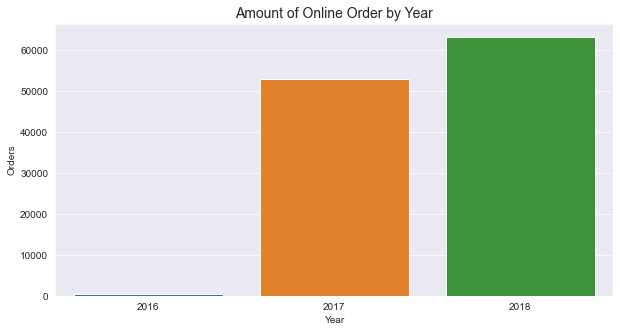

In [44]:
plt.subplots(figsize=(10, 5))
sns.countplot(x='order_purchase_year', data=Olist)
plt.title('Amount of Online Order by Year', size=14)
plt.ylabel('Orders')
plt.xlabel('Year')

plt.show()


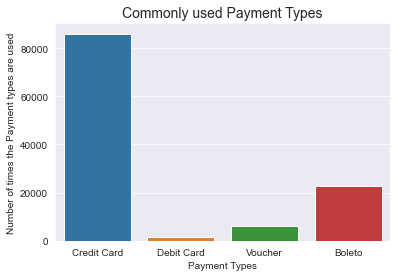

In [45]:
sns.countplot(x='payment_type', data=Olist)
plt.title('Commonly used Payment Types', size=14)
plt.ylabel('Number of times the Payment types are used')
plt.xlabel('Payment Types')

plt.show()

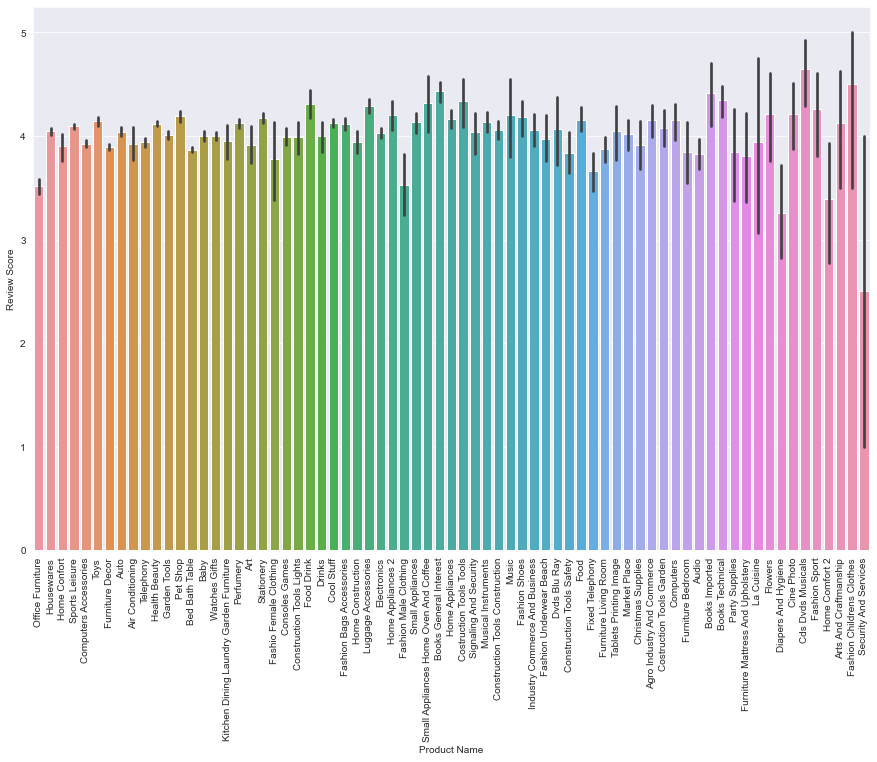

In [46]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(y='review_score',x='product_category_name_english',data=Olist)
plt.ylabel('Review Score')
plt.xlabel('Product Name')

plt.show()


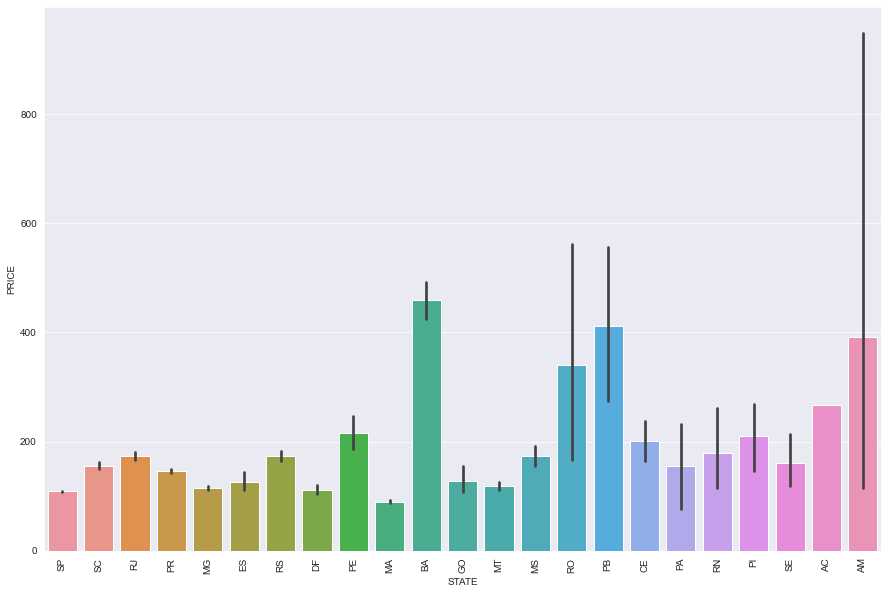

In [47]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(y='price',x='seller_state',data=Olist)
plt.ylabel('PRICE')
plt.xlabel('STATE')

plt.show()


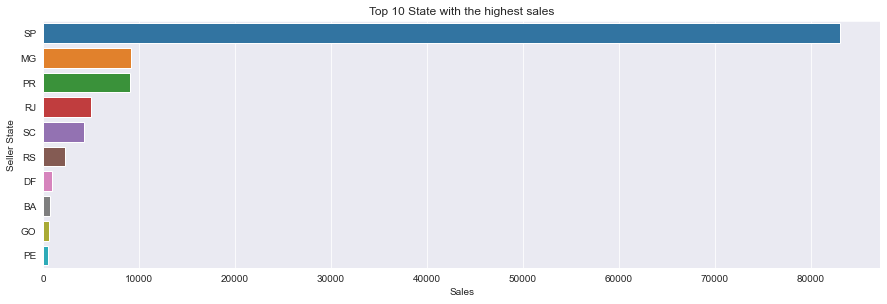

In [48]:
top10 = Olist['seller_state'].value_counts().reset_index().nlargest(10, 'seller_state')


plt.figure(figsize=(15, 10))
plt.subplot(211)
sns.barplot(data = top10, x = 'seller_state', y = 'index')
plt.title('Top 10 State with the highest sales')
plt.xlabel('Sales')
plt.ylabel('Seller State');


In [49]:
top10.value_counts(normalize=True)*100

index  seller_state
SP     83121           10.0
SC     4252            10.0
RS     2244            10.0
RJ     4949            10.0
PR     9029            10.0
PE     465             10.0
MG     9099            10.0
GO     540             10.0
DF     938             10.0
BA     700             10.0
dtype: float64

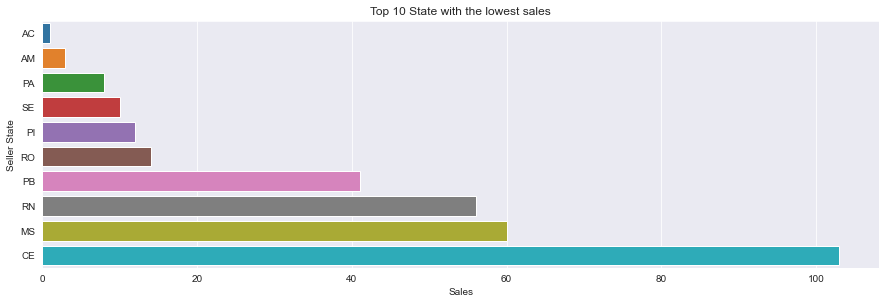

In [50]:
bottom10 = Olist['seller_state'].value_counts().reset_index().nsmallest(10, 'seller_state')


plt.figure(figsize=(15, 10))
plt.subplot(211)
sns.barplot(data = bottom10, x = 'seller_state', y = 'index')
plt.title('Top 10 State with the lowest sales')
plt.xlabel('Sales')
plt.ylabel('Seller State');

In [51]:
bottom10.value_counts(normalize=True)*100

index  seller_state
SE     10              10.0
RO     14              10.0
RN     56              10.0
PI     12              10.0
PB     41              10.0
PA     8               10.0
MS     60              10.0
CE     103             10.0
AM     3               10.0
AC     1               10.0
dtype: float64

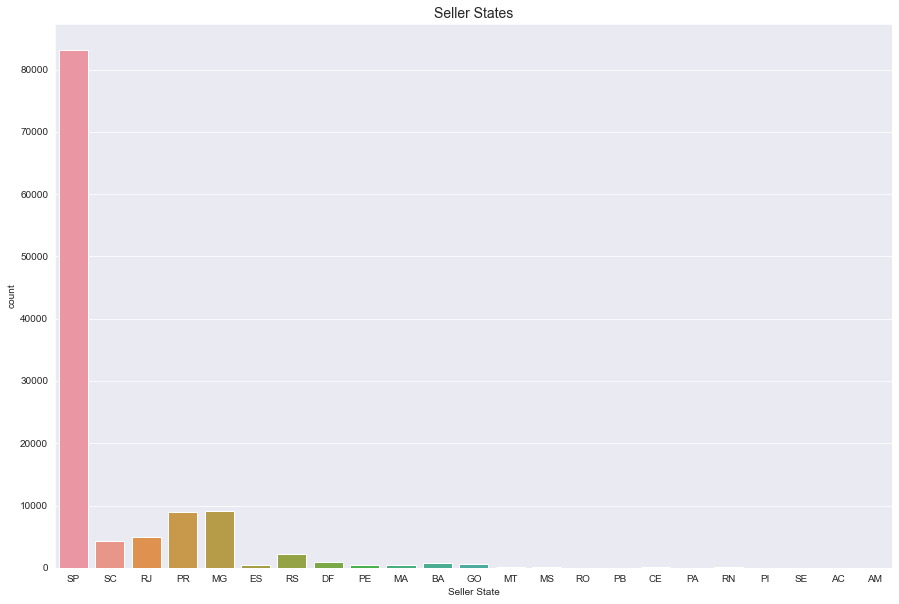

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(x='seller_state', data=Olist)
plt.title('Seller States', size=14)

plt.xlabel('Seller State')

plt.show()

In [53]:
Olist.seller_state.value_counts(normalize=True)*100


SP    0.712989
MG    0.078049
PR    0.077448
RJ    0.042451
SC    0.036472
RS    0.019248
DF    0.008046
BA    0.006004
GO    0.004632
PE    0.003989
MA    0.003517
ES    0.003251
MT    0.001261
CE    0.000884
MS    0.000515
RN    0.000480
PB    0.000352
RO    0.000120
PI    0.000103
SE    0.000086
PA    0.000069
AM    0.000026
AC    0.000009
Name: seller_state, dtype: float64

In [54]:
Olist.seller_state.replace('AC','Others',inplace=True)
Olist.seller_state.replace('AM','Others',inplace=True)
Olist.seller_state.replace('PA','Others',inplace=True)
Olist.seller_state.replace('SE','Others',inplace=True)
Olist.seller_state.replace('PI','Others',inplace=True)
Olist.seller_state.replace('RO','Others',inplace=True)
Olist.seller_state.replace('PB','Others',inplace=True)
Olist.seller_state.replace('RN','Others',inplace=True)
Olist.seller_state.replace('MS','Others',inplace=True)
Olist.seller_state.replace('CE','Others',inplace=True)
Olist.seller_state.replace('MT','Others',inplace=True)
Olist.seller_state.replace('ES','Others',inplace=True)
Olist.seller_state.replace('MA','Others',inplace=True)
Olist.seller_state.replace('PE','Others',inplace=True)
Olist.seller_state.replace('GO','Others',inplace=True)
Olist.seller_state.replace('BA','Others',inplace=True)
Olist.seller_state.replace('DF','Others',inplace=True)
Olist.seller_state.replace('RS','Others',inplace=True)
Olist.seller_state.replace('SC','Others',inplace=True)
Olist.seller_state.replace('RJ','Others',inplace=True)
Olist.seller_state.replace('PR','Others',inplace=True)
Olist.seller_state.replace('MG','Others',inplace=True)

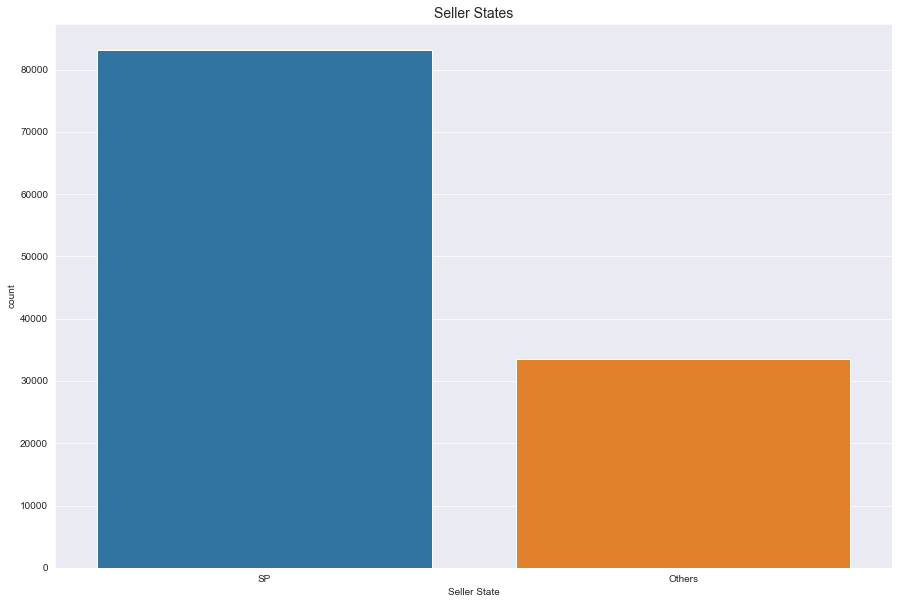

In [55]:
plt.figure(figsize=(15,10))
sns.countplot(x='seller_state', data=Olist)
plt.title('Seller States', size=14)

plt.xlabel('Seller State')

plt.show()

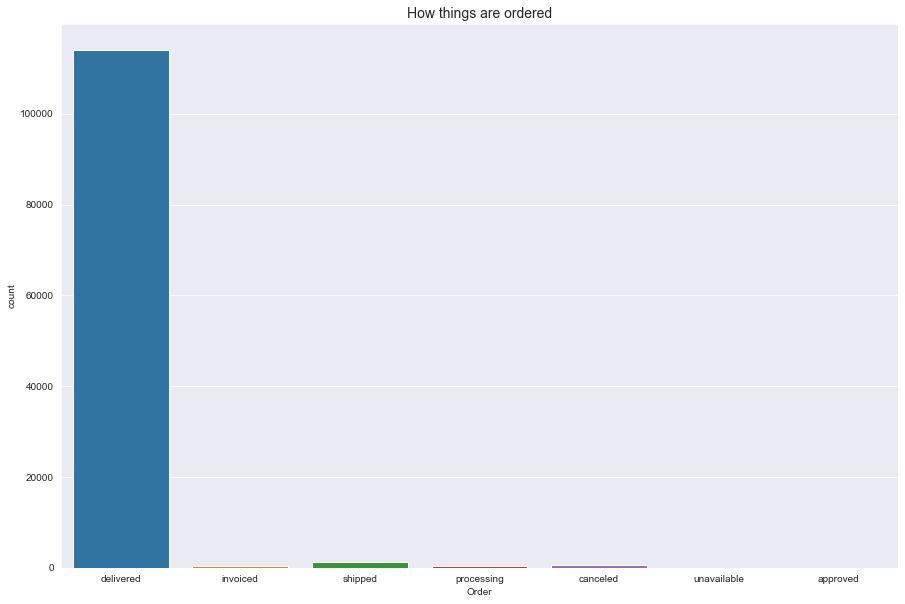

In [56]:
plt.figure(figsize=(15,10))
sns.countplot(x='order_status', data=Olist)
plt.title('How things are ordered', size=14)

plt.xlabel('Order')

plt.show()

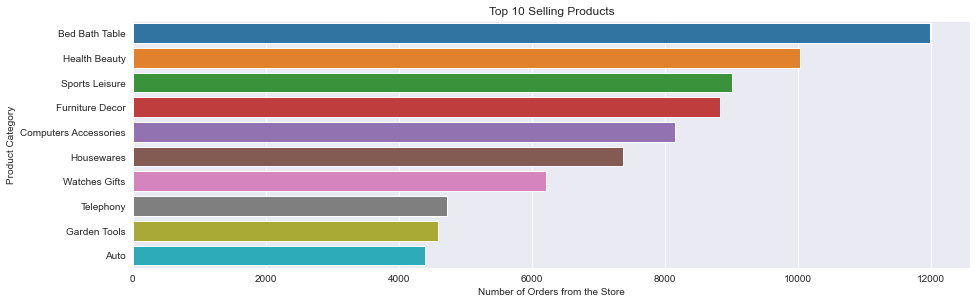

In [57]:
top10 = Olist['product_category_name_english'].value_counts().reset_index().nlargest(10, 'product_category_name_english')


plt.figure(figsize=(15, 10))
plt.subplot(211)
sns.barplot(data = top10, x = 'product_category_name_english', y = 'index')
plt.title('Top 10 Selling Products')
plt.xlabel('Number of Orders from the Store')
plt.ylabel('Product Category');


In [58]:
top10.value_counts(normalize=True)*100

index                  product_category_name_english
Watches Gifts          6213                             10.0
Telephony              4726                             10.0
Sports Leisure         9005                             10.0
Housewares             7380                             10.0
Health Beauty          10030                            10.0
Garden Tools           4590                             10.0
Furniture Decor        8833                             10.0
Computers Accessories  8151                             10.0
Bed Bath Table         11990                            10.0
Auto                   4400                             10.0
dtype: float64

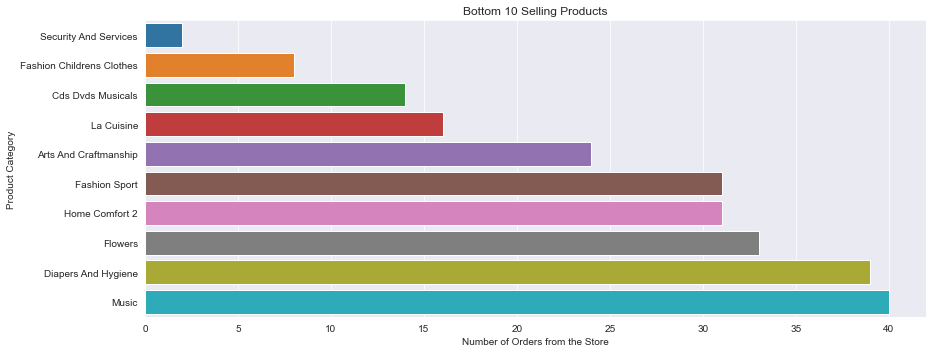

In [59]:
bottom10 = Olist['product_category_name_english'].value_counts().reset_index().nsmallest(10, 'product_category_name_english')

plt.figure(figsize=(14, 12))
plt.subplot(212)
sns.barplot(data = bottom10, x = 'product_category_name_english', y = 'index')
plt.title('Bottom 10 Selling Products')
plt.xlabel('Number of Orders from the Store')
plt.ylabel('Product Category');

In [60]:
bottom10.value_counts(normalize=True)*100

index                      product_category_name_english
Security And Services      2                                10.0
Music                      40                               10.0
La Cuisine                 16                               10.0
Home Comfort 2             31                               10.0
Flowers                    33                               10.0
Fashion Sport              31                               10.0
Fashion Childrens Clothes  8                                10.0
Diapers And Hygiene        39                               10.0
Cds Dvds Musicals          14                               10.0
Arts And Craftmanship      24                               10.0
dtype: float64

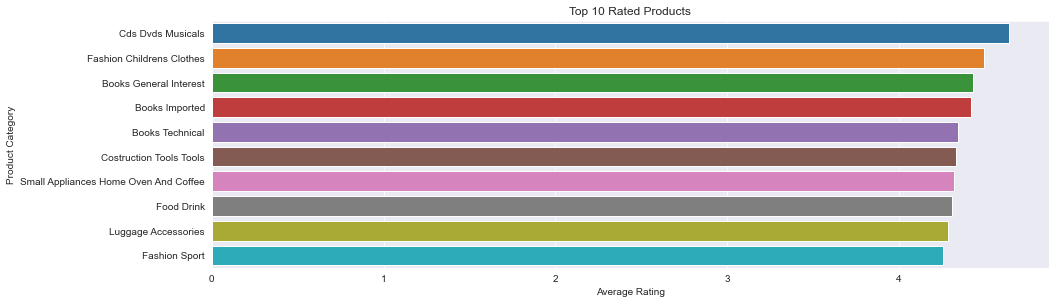

In [61]:
top10 = Olist.groupby('product_category_name_english').mean()['review_score'].reset_index().sort_values('review_score', ascending = False).nlargest(10, 'review_score')


plt.figure(figsize=(15, 10))


plt.subplot(211)
sns.barplot(data = top10, x = 'review_score', y = 'product_category_name_english')
plt.title('Top 10 Rated Products')
plt.xlabel('Average Rating')
plt.ylabel('Product Category');


In [62]:
top10.value_counts(normalize=True)*100

product_category_name_english          review_score
Small Appliances Home Oven And Coffee  4.320513        10.0
Luggage Accessories                    4.290628        10.0
Food Drink                             4.312715        10.0
Fashion Sport                          4.258065        10.0
Fashion Childrens Clothes              4.500000        10.0
Costruction Tools Tools                4.333333        10.0
Cds Dvds Musicals                      4.642857        10.0
Books Technical                        4.345588        10.0
Books Imported                         4.419355        10.0
Books General Interest                 4.431858        10.0
dtype: float64

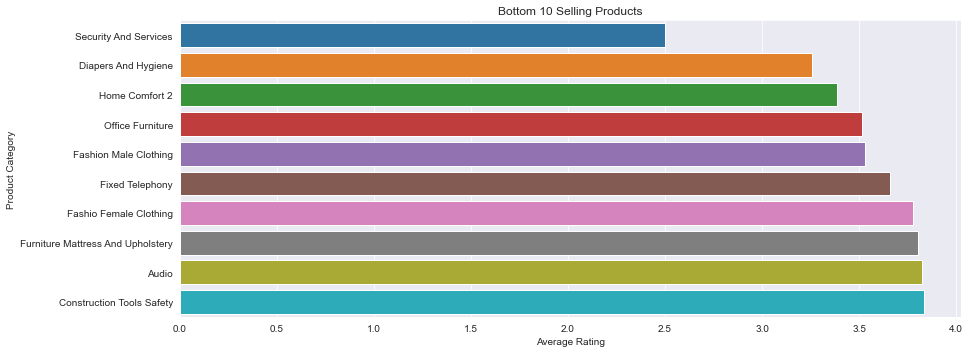

In [63]:
bottom10 = Olist.groupby('product_category_name_english').mean()['review_score'].reset_index().sort_values('review_score', ascending = False).nsmallest(10, 'review_score')

plt.figure(figsize=(14, 12))

plt.subplot(212)
sns.barplot(data = bottom10, x = 'review_score', y = 'product_category_name_english')
plt.title('Bottom 10 Selling Products')
plt.xlabel('Average Rating')
plt.ylabel('Product Category');

In [64]:
bottom10.value_counts(normalize=True)*100

product_category_name_english      review_score
Security And Services              2.500000        10.0
Office Furniture                   3.516779        10.0
Home Comfort 2                     3.387097        10.0
Furniture Mattress And Upholstery  3.804878        10.0
Fixed Telephony                    3.661765        10.0
Fashion Male Clothing              3.531034        10.0
Fashio Female Clothing             3.780000        10.0
Diapers And Hygiene                3.256410        10.0
Construction Tools Safety          3.834171        10.0
Audio                              3.824147        10.0
dtype: float64

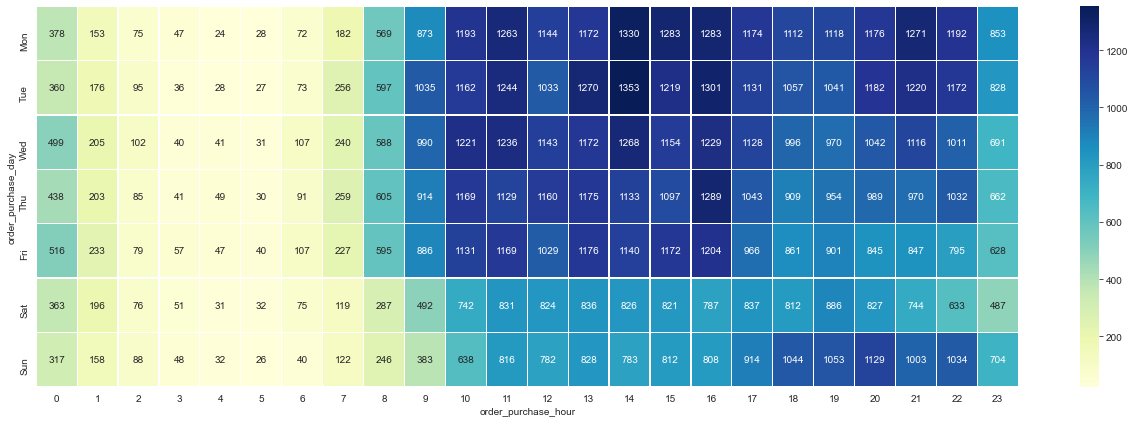

In [65]:
#customer and eliverybehaviour

purchase_count = Olist.groupby(['order_purchase_day', 'order_purchase_hour']).count()['price'].unstack()
plt.figure(figsize=(22,7))
sns.heatmap(purchase_count.reindex(index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), cmap="YlGnBu", annot=True, fmt="d", linewidths=0.2)
plt.show()

In [66]:
matrix = Olist.corr()
px.imshow(matrix)

<AxesSubplot:xlabel='price', ylabel='payment_value'>

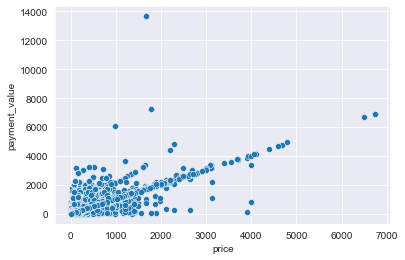

In [67]:
sns.scatterplot(x='price',y='payment_value',data=Olist)

<AxesSubplot:xlabel='price', ylabel='freight_value'>

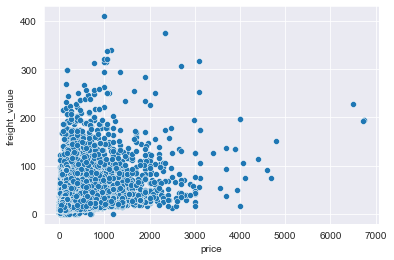

In [68]:
sns.scatterplot(x='price',y='freight_value',data=Olist)

<AxesSubplot:xlabel='payment_value', ylabel='freight_value'>

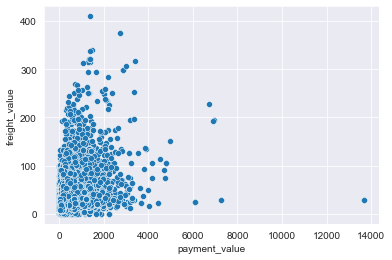

In [69]:
sns.scatterplot(x='payment_value',y='freight_value',data=Olist)

(array([2.3000e+01, 9.5000e+01, 2.0660e+03, 1.8898e+04, 3.8003e+04,
        4.0401e+04, 1.3236e+04, 3.1290e+03, 6.8600e+02, 4.4000e+01]),
 array([-0.16251893,  0.73524027,  1.63299947,  2.53075868,  3.42851788,
         4.32627708,  5.22403628,  6.12179548,  7.01955469,  7.91731389,
         8.81507309]),
 <BarContainer object of 10 artists>)

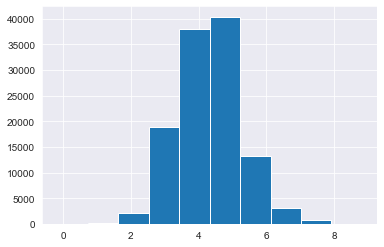

In [70]:
plt.hist(np.log(Olist.price))

(array([2.3000e+01, 9.5000e+01, 2.0660e+03, 1.8898e+04, 3.8003e+04,
        4.0401e+04, 1.3236e+04, 3.1290e+03, 6.8600e+02, 4.4000e+01]),
 array([-0.16251893,  0.73524027,  1.63299947,  2.53075868,  3.42851788,
         4.32627708,  5.22403628,  6.12179548,  7.01955469,  7.91731389,
         8.81507309]),
 <BarContainer object of 10 artists>)

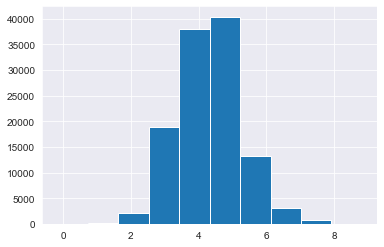

In [71]:
plt.hist(np.log(num_o.price))

# INFERENTIAL STATISTICS

In [72]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [73]:
#ANOVA BETWEEN PAYMENT MODES
#Ho-There's no significant statistical difference in payment types
#H1-There's a significant statistical difference in payment types
model = ols('price ~ payment_type',data=Olist).fit()
                
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

sum_sq        df           F        PR(>F)
payment_type  1.060974e+07       3.0  104.911557  7.943819e-68
Residual      3.929822e+09  116577.0         NaN           NaN

In [74]:
#Pairwise comparison of Payment Types
pair_t = model.t_test_pairwise('payment_type')
pair_t.result_frame

coef   std err          t         P>|t|  \
Credit Card-Boleto      21.976781  1.370209  16.038997  7.872429e-58   
Debit Card-Boleto        4.286917  4.660440   0.919852  3.576519e-01   
Voucher-Boleto           0.408806  2.629265   0.155483  8.764407e-01   
Debit Card-Credit Card -17.689865  4.541594  -3.895078  9.822176e-05   
Voucher-Credit Card    -21.567975  2.412345  -8.940669  3.922902e-19   
Voucher-Debit Card      -3.878110  5.065732  -0.765558  4.439410e-01   

                        Conf. Int. Low  Conf. Int. Upp.  pvalue-hs  reject-hs  
Credit Card-Boleto           19.291193        24.662370   0.000000       True  
Debit Card-Boleto            -4.847473        13.421307   0.734960      False  
Voucher-Boleto               -4.744512         5.562124   0.876441      False  
Debit Card-Credit Card      -26.591318        -8.788411   0.000393       True  
Voucher-Credit Card         -26.296133       -16.839817   0.000000       True  
Voucher-Debit Card          -13.806865         6.050644   0.734960      False

In [75]:
#Anova between products
#Ho- There's no signifiant statistical differences in prices of products
#H1- There's a significant statistical differences in prices of products
model = ols('price ~ product_category_name_english',data=Olist).fit()
                
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

sum_sq        df           F  PR(>F)
product_category_name_english  4.464649e+08      70.0  212.683424     0.0
Residual                       3.493967e+09  116510.0         NaN     NaN

In [76]:
#Pairwise Comparison
pair_t = model.t_test_pairwise('product_category_name_english')
pair_t.result_frame

coef     std err  \
Air Conditioning-Agro Industry And Commerce         -147.400257   14.775050   
Art-Agro Industry And Commerce                      -219.820443   15.998009   
Arts And Craftmanship-Agro Industry And Commerce    -257.122401   36.993589   
Audio-Agro Industry And Commerce                    -194.910167   14.061023   
Auto-Agro Industry And Commerce                     -192.161719   11.216854   
Baby-Agro Industry And Commerce                     -196.990736   11.329693   
Bed Bath Table-Agro Industry And Commerce           -240.346019   11.022856   
Books General Interest-Agro Industry And Commerce   -247.400930   13.117901   
Books Imported-Agro Industry And Commerce           -254.450506   24.549719   
Books Technical-Agro Industry And Commerce          -261.662474   15.141146   
Cds Dvds Musicals-Agro Industry And Commerce        -280.563294   47.550419   
Christmas Supplies-Agro Industry And Commerce       -275.758796   17.677014   
Cine Photo-Agro Industry And Commerce               -238.635070   22.896573   
Computers-Agro Industry And Commerce                 770.982986   15.978544   
Computers Accessories-Agro Industry And Commerce    -216.139522   11.076162   
Consoles Games-Agro Industry And Commerce           -192.899414   12.006682   
Construction Tools Construction-Agro Industry A...  -177.063774   12.263925   
Construction Tools Lights-Agro Industry And Com...  -199.053603   14.646064   
Construction Tools Safety-Agro Industry And Com...  -121.763889   16.422500   
Cool Stuff-Agro Industry And Commerce               -166.505318   11.247277   
Costruction Tools Garden-Agro Industry And Comm...  -226.414896   15.505270   
Costruction Tools Tools-Agro Industry And Commerce  -179.630913   20.114860   
Diapers And Hygiene-Agro Industry And Commerce      -292.511535   29.798317   
Drinks-Agro Industry And Commerce                   -273.906766   13.996284   
Dvds Blu Ray-Agro Industry And Commerce             -241.732348   23.267495   
Electronics-Agro Industry And Commerce              -274.049983   11.381372   
Fashio Female Clothing-Agro Industry And Commerce   -274.917351   26.809951   
Fashion Bags Accessories-Agro Industry And Comm...  -257.566432   11.524836   
Fashion Childrens Clothes-Agro Industry And Com...  -261.474901   62.189810   
Fashion Male Clothing-Agro Industry And Commerce    -252.488151   18.050482   
Fashion Shoes-Agro Industry And Commerce            -243.141511   15.062362   
Fashion Sport-Agro Industry And Commerce            -263.528731   32.960206   
Fashion Underwear Beach-Agro Industry And Commerce  -260.968304   18.090222   
Fixed Telephony-Agro Industry And Commerce          -105.716261   15.141146   
Flowers-Agro Industry And Commerce                  -299.068575   32.058486   
Food-Agro Industry And Commerce                     -275.444858   13.267053   
Food Drink-Agro Industry And Commerce               -276.161409   14.901534   
Furniture Bedroom-Agro Industry And Commerce        -156.708690   18.894621   
Furniture Decor-Agro Industry And Commerce          -245.250455   11.063331   
Furniture Living Room-Agro Industry And Commerce    -194.417711   13.242798   
Furniture Mattress And Upholstery-Agro Industry...  -214.757858   29.162143   
Garden Tools-Agro Industry And Commerce             -219.531133   11.204271   
Health Beauty-Agro Industry And Commerce            -202.904356   11.045004   
Home Appliances-Agro Industry And Commerce          -229.419722   12.462263   
Home Appliances 2-Agro Industry And Commerce         124.684108   15.154574   
Home Comfort 2-Agro Industry And Commerce           -307.765183   32.960206   
Home Confort-Agro Industry And Commerce             -197.176988   13.481091   
Home Construction-Agro Industry And Commerce        -194.535773   12.892956   
Housewares-Agro Industry And Commerce               -242.071877   11.093499   
Industry Commerce And Business-Agro Industry An...  -185.163467   15.141146   
Kitchen Dining Laundry Garden 

In [77]:
#Anova between products
#Ho-There's no statistical difference in prices amongst seller states
#H1-There's a statistical difference in prices amongst seller states
model = ols('price ~ seller_state',data=Olist).fit()
                
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

sum_sq        df            F         PR(>F)
seller_state  4.192586e+07       1.0  1253.730146  3.666595e-273
Residual      3.898506e+09  116579.0          NaN            NaN

In [78]:
#Pairwise Comparison
pair_t = model.t_test_pairwise('seller_state')
pair_t.result_frame

coef   std err          t          P>|t|  Conf. Int. Low  \
SP-Others -41.921473  1.183953 -35.408052  3.666595e-273      -44.242003   

           Conf. Int. Upp.  pvalue-hs  reject-hs  
SP-Others       -39.600943        0.0       True

In [79]:
#Anova between Order sales in the years category
#Ho- There's no statistical significance in order status 
#H1- There's a statistical significance in order status
model = ols('price ~ order_status ',data=Olist).fit()
                
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

sum_sq        df          F        PR(>F)
order_status  4.292748e+06       6.0  21.189237  5.322514e-25
Residual      3.936139e+09  116574.0        NaN           NaN

In [80]:
#Pairwise Comparison
pair_t = model.t_test_pairwise('order_status')
pair_t.result_frame

coef     std err         t         P>|t|  \
canceled-approved       111.551453  106.377209  1.048641  2.943458e-01   
delivered-approved       50.146360  106.091227  0.472672  6.364480e-01   
invoiced-approved       101.936300  106.526118  0.956914  3.386128e-01   
processing-approved     100.999107  106.528524  0.948094  3.430833e-01   
shipped-approved         61.446207  106.219659  0.578482  5.629396e-01   
unavailable-approved    216.946190  126.801602  1.710910  8.710030e-02   
delivered-canceled      -61.405093    7.832890 -7.839392  4.565335e-15   
invoiced-canceled        -9.615152   12.402402 -0.775265  4.381845e-01   
processing-canceled     -10.552346   12.423046 -0.849417  3.956511e-01   
shipped-canceled        -50.105246    9.413902 -5.322474  1.025541e-07   
unavailable-canceled    105.394738   69.890286  1.508003  1.315566e-01   
invoiced-delivered       51.789940    9.646628  5.368709  7.945326e-08   
processing-delivered     50.852747    9.673155  5.257100  1.466014e-07   
shipped-delivered        11.299847    5.278201  2.140852  3.228805e-02   
unavailable-delivered   166.799831   69.454229  2.401579  1.632603e-02   
processing-invoiced      -0.937194   13.639477 -0.068712  9.452191e-01   
shipped-invoiced        -40.490094   10.969267 -3.691231  2.232733e-04   
unavailable-invoiced    115.009890   70.116727  1.640263  1.009531e-01   
shipped-processing      -39.552900   10.992602 -3.598138  3.206362e-04   
unavailable-processing  115.947084   70.120381  1.653543  9.822304e-02   
unavailable-shipped     155.499984   69.650250  2.232583  2.557833e-02   

                        Conf. Int. Low  Conf. Int. Upp.     pvalue-hs  \
canceled-approved           -96.946211       320.049116  9.385198e-01   
delivered-approved         -157.790783       258.083503  9.446407e-01   
invoiced-approved          -106.853223       310.725824  9.446407e-01   
processing-approved        -107.795131       309.793345  9.446407e-01   
shipped-approved           -146.742660       269.635074  9.446407e-01   
unavailable-approved        -31.582964       465.475345  6.649753e-01   
delivered-canceled          -76.757434       -46.052752  9.559020e-14   
invoiced-canceled           -33.923666        14.693361  9.446407e-01   
processing-canceled         -34.901321        13.796629  9.446407e-01   
shipped-canceled            -68.556346       -31.654146  1.948525e-06   
unavailable-canceled        -31.589128       242.378603  7.190210e-01   
invoiced-delivered           32.882701        70.697180  1.589064e-06   
processing-delivered         31.893515        69.811979  2.638822e-06   
shipped-delivered             0.954656        21.645038  3.473214e-01   
unavailable-delivered        30.670630       302.929031  2.187902e-01   
processing-invoiced         -27.670355        25.795968  9.452191e-01   
shipped-invoiced            -61.989685       -18.990502  3.788874e-03   
unavailable-invoiced        -22.417795       252.437576  6.793063e-01   
shipped-processing          -61.098229       -18.007571  5.117861e-03   
unavailable-processing      -21.487765       253.381932  6.793063e-01   
unavailable-shipped          18.986585       292.013382  3.042438e-01   

                        reject-hs  
canceled-approved           False  
delivered-approved          False  
invoiced-approved           False  
processing-approved         False  
shipped-approved            False  
unavailable-approved        False  
delivered-canceled           True  
invoiced-canceled           False  
processing-canceled         False  
shipped-canceled             True  
unavailable-canceled        False  
invoiced-delivered           True  
processing-delivered         True  
shipped-delivered           False  
unavailable-delivered       False  
processing-invoiced         False  
shipped-invoiced             True  
unavailable-invoiced        False  
shipped-processing           True  
unavailable-processing      False  
unavailable-shipped         False

# MACHINE LEARNING AND FEATURE ENGINEERING

In [81]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [82]:
cat_o = Olist.select_dtypes(include=['object'])
cat_o.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

           customer_city customer_state                          order_id  \
0                 Franca             SP  00e7ee1b050b8499577073aeb2a297a1   
1  Sao Bernardo Do Campo             SP  29150127e6685892b6eab3eec79f59c7   
2              Sao Paulo             SP  b2059ed67ce144a36e2aa97d2c9e9ad2   
3        Mogi Das Cruzes             SP  951670f92359f4fe4a63112aa7306eba   
4               Campinas             SP  6b7d50bd145f6fc7f33cebabd7e49d0f   

  order_status                        product_id  \
0    delivered  a9516a079e37a9c9c36b9b78b10169e8   
1    delivered  4aa6014eceb682077f9dc4bffebc05b0   
2    delivered  bd07b66896d6f1494f5b86251848ced7   
3    delivered  a5647c44af977b148e0a3a4751a09e2e   
4    delivered  9391a573abe00141c56e38d84d7d5b3b   

                          seller_id payment_type  \
0  7c67e1448b00f6e969d365cea6b010ab  Credit Card   
1  b8bc237ba3788b23da09c0f1f3a3288c  Credit Card   
2  7c67e1448b00f6e969d365cea6b010ab  Credit Card   
3  7c67e1448b00f6e969d365cea6b010ab  Credit Card   
4  4a3ca9315b744ce9f8e9374361493884  Credit Card   

                          review_id      seller_city seller_state  \
0  88b8b52d46df026a9d1ad2136a59b30b  Itaquaquecetuba           SP   
1  02fc48a9efa3e3d0f1a8ea26507eeec3           Itajai       Others   
2  5ad6695d76ee186dc473c42706984d87  Itaquaquecetuba           SP   
3  059a801bb31f6aab2266e672cab87bc5  Itaquaquecetuba           SP   
4  8490879d58d6c5d7773f2739a03f089a         Ibitinga           SP   

   product_category_name product_category_name_english order_purchase_day  \
0      moveis_escritorio              Office Furniture                Tue   
1  utilidades_domesticas                    Housewares                Fri   
2      moveis_escritorio              Office Furniture                Sat   
3      moveis_escritorio              Office Furniture                Tue   
4          casa_conforto                  Home Confort                Sun   

  order_purchase_mon  
0                Jun  
1                Feb  
2                Jun  
3                Apr  
4                Aug

In [83]:
#Label Encoding
def encoding():
    LE=LabelEncoder()
    for col in cat_o:
        Olist[col]=LE.fit_transform(Olist[col].astype(str))    
    print(Olist.info())
 
    
    
encoding()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 118766
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   customer_id                    116581 non-null  int32          
 1   customer_unique_id             116581 non-null  int32          
 2   customer_zip_code_prefix       116581 non-null  int64          
 3   customer_city                  116581 non-null  int32          
 4   customer_state                 116581 non-null  int32          
 5   order_id                       116581 non-null  int32          
 6   order_status                   116581 non-null  int32          
 7   order_purchase_timestamp       116581 non-null  datetime64[ns] 
 8   order_estimated_delivery_date  116581 non-null  datetime64[ns] 
 9   order_item_id                  116581 non-null  float64        
 10  product_id                     116581 non-null  int32   

In [84]:
Olist.head()

customer_id  customer_unique_id  customer_zip_code_prefix  customer_city  \
0         2561               49348                     14409           1376   
1         9380               15118                      9790           3409   
2        29830                2224                      1151           3576   
3        68114               13909                      8775           2329   
4        30070               19328                     13056            704   

   customer_state  order_id  order_status order_purchase_timestamp  \
0              25       328             2      2017-05-16 15:05:00   
1              25     15493             2      2018-01-12 20:48:00   
2              25     67467             2      2018-05-19 16:07:00   
3              25     56314             2      2018-03-13 16:06:00   
4              25     40811             2      2018-07-29 09:51:00   

  order_estimated_delivery_date  order_item_id  product_id  seller_id  \
0                    2017-06-05            1.0       21308       1502   
1                    2018-02-06            1.0        9537       2173   
2                    2018-06-13            1.0       23830       1502   
3                    2018-04-10            1.0       20826       1502   
4                    2018-08-15            1.0       18617        865   

  shipping_limit_date   price  freight_value  payment_sequential  \
0 2017-05-22 15:22:00  124.99          21.88                 1.0   
1 2018-01-18 20:58:00  289.00          46.48                 1.0   
2 2018-06-05 16:19:00  139.94          17.79                 1.0   
3 2018-03-27 16:31:00  149.94          23.36                 1.0   
4 2018-07-31 10:10:00  230.00          22.25                 1.0   

   payment_type  payment_installments  payment_value  review_id  review_score  \
0             1                   2.0         146.87      51978           4.0   
1             1                   8.0         335.48       1093           5.0   
2             1                   7.0         157.73      34369           5.0   
3             1                   1.0         173.30       2117           5.0   
4             1                   8.0         252.25      50384           5.0   

  review_creation_date review_answer_timestamp  seller_zip_code_prefix  \
0           2017-05-26     2017-05-30 22:34:00                  8577.0   
1           2018-01-30     2018-02-10 22:43:00                 88303.0   
2           2018-06-15     2018-06-15 12:10:00                  8577.0   
3           2018-03-29     2018-04-02 18:36:00                  8577.0   
4           2018-08-10     2018-08-17 01:59:00                 14940.0   

   seller_city  seller_state  product_category_name  \
0          256             1                     55   
1          247             0                     70   
2          256             1                     55   
3          256             1                     55   
4          225             1                     14   

   product_category_name_english  order_purchase_year  order_purchase_month  \
0                             57                 2017                     5   
1                             49                 2018                     1   
2                             57                 2018                     5   
3                             57                 2018                     3   
4                             47                 2018                     7   

   order_purchase_dayofweek  order_purchase_hour  order_purchase_day  \
0                         1                   15                   5   
1                         4                   20                   0   
2                         5                   16                   2   
3                         1                   16                   5   
4                         6                    9                   3   

   order_purchase_mon review_response_time delivery_against_estimated  
0               

In [85]:
Olist.drop(['delivery_against_estimated','review_response_time','review_answer_timestamp','review_creation_date','shipping_limit_date','order_estimated_delivery_date','order_purchase_timestamp'],axis=1,inplace=True)

In [86]:
X = Olist.drop('price',axis=1)
y = Olist['price']

print(X.shape)
X.head()

(116581, 28)


customer_id  customer_unique_id  customer_zip_code_prefix  customer_city  \
0         2561               49348                     14409           1376   
1         9380               15118                      9790           3409   
2        29830                2224                      1151           3576   
3        68114               13909                      8775           2329   
4        30070               19328                     13056            704   

   customer_state  order_id  order_status  order_item_id  product_id  \
0              25       328             2            1.0       21308   
1              25     15493             2            1.0        9537   
2              25     67467             2            1.0       23830   
3              25     56314             2            1.0       20826   
4              25     40811             2            1.0       18617   

   seller_id  freight_value  payment_sequential  payment_type  \
0       1502          21.88                 1.0             1   
1       2173          46.48                 1.0             1   
2       1502          17.79                 1.0             1   
3       1502          23.36                 1.0             1   
4        865          22.25                 1.0             1   

   payment_installments  payment_value  review_id  review_score  \
0                   2.0         146.87      51978           4.0   
1                   8.0         335.48       1093           5.0   
2                   7.0         157.73      34369           5.0   
3                   1.0         173.30       2117           5.0   
4                   8.0         252.25      50384           5.0   

   seller_zip_code_prefix  seller_city  seller_state  product_category_name  \
0                  8577.0          256             1                     55   
1                 88303.0          247             0                     70   
2                  8577.0          256             1                     55   
3                  8577.0          256             1                     55   
4                 14940.0          225             1                     14   

   product_category_name_english  order_purchase_year  order_purchase_month  \
0                             57                 2017                     5   
1                             49                 2018                     1   
2                             57                 2018                     5   
3                             57                 2018                     3   
4                             47                 2018                     7   

   order_purchase_dayofweek  order_purchase_hour  order_purchase_day  \
0                         1                   15                   5   
1                         4                   20                   0   
2                         5                   16                   2   
3                         1                   16                   5   
4                         6                    9                   3   

   order_purchase_mon  
0                   5  
1                   3  
2                   5  
3                   0  
4                   1

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print('size of train predictors: {} and size of train labels: {}'.format(X_train.shape, y_train.shape))
print('size of test predictors: {} and size of test labels: {}'.format(X_test.shape, y_test.shape))

size of train predictors: (81606, 28) and size of train labels: (81606,)
size of test predictors: (34975, 28) and size of test labels: (34975,)


TRAINING BEFORE FEATURE SELECTION

In [88]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm
import math


LinearRegression

In [89]:
LR=LinearRegression().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(LR.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(LR.score(X_test,y_test)*100))

print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=LR.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 65.861%
The accuracy of the test is . 59.023%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 12142.035347370891
*********************************************************************************************************************
The RMSE is 110.19090410451713
*********************************************************************************************************************
The R Square is 1.0
*********************************************************************************************************************
The Adjusted R Square is 1.0
*********************************************************************************************************************
The MAPE is 4719.33707640628
********************************************************

RandomForestRegressor

In [90]:
RFR=RandomForestRegressor().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(RFR.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(RFR.score(X_test,y_test)*100))

print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=RFR.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 98.068%
The accuracy of the test is . 86.228%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 4080.9419471525866
*********************************************************************************************************************
The RMSE is 63.88225064251092
*********************************************************************************************************************
The R Square is 0.6873187026851973
*********************************************************************************************************************
The Adjusted R Square is 0.6870681711129197
*********************************************************************************************************************
The MAPE is 2075.9394010007163
*************************

DecisionTreeRegressor

In [91]:
DTR=DecisionTreeRegressor().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(DTR.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(DTR.score(X_test,y_test)*100))

print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=DTR.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 100.000%
The accuracy of the test is . 71.421%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 8468.527077040744
*********************************************************************************************************************
The RMSE is 92.02460039055178
*********************************************************************************************************************
The R Square is 0.5796938217465168
*********************************************************************************************************************
The Adjusted R Square is 0.5793570572243656
*********************************************************************************************************************
The MAPE is 2492.646947819872
**************************

AdaBoostRegressor

In [92]:
ADA=AdaBoostRegressor().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(ADA.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(ADA.score(X_test,y_test)*100))

print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=ADA.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 44.869%
The accuracy of the test is . 32.248%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 20075.861350334777
*********************************************************************************************************************
The RMSE is 141.68931275976595
*********************************************************************************************************************
The R Square is 0.7185926909981755
*********************************************************************************************************************
The Adjusted R Square is 0.7183672172772331
*********************************************************************************************************************
The MAPE is 11980.005514015305
************************

KNeighborsRegressor

In [93]:
KNR=KNeighborsRegressor().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(KNR.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(KNR.score(X_test,y_test)*100))

print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=KNR.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 27.213%
The accuracy of the test is . -12.000%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 33187.26683850396
*********************************************************************************************************************
The RMSE is 182.17372708078395
*********************************************************************************************************************
The R Square is 0.07427369733991629
*********************************************************************************************************************
The Adjusted R Square is 0.07353197192142824
*********************************************************************************************************************
The MAPE is 9430.10269621158
************************

GradientBoostingRegressor

In [94]:
GBR=GradientBoostingRegressor().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(GBR.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(GBR.score(X_test,y_test)*100))

print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=GBR.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 88.698%
The accuracy of the test is . 84.611%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 4559.865759683385
*********************************************************************************************************************
The RMSE is 67.52677809345997
*********************************************************************************************************************
The R Square is 0.7118531708449871
*********************************************************************************************************************
The Adjusted R Square is 0.7116222971765747
*********************************************************************************************************************
The MAPE is 2784.6698214817675
**************************

XGBRegressor

In [95]:
XGB=XGBRegressor().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(XGB.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(XGB.score(X_test,y_test)*100))


print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=XGB.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 96.758%
The accuracy of the test is . 87.812%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 3611.4663130254053
*********************************************************************************************************************
The RMSE is 60.095476643632715
*********************************************************************************************************************
The R Square is 0.6716486477033033
*********************************************************************************************************************
The Adjusted R Square is 0.6713855607158281
*********************************************************************************************************************
The MAPE is 2213.833227240772
*************************

SELECTING MOST APPROPIATE FEATURES USING KBEST METHOD

In [96]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 

kbest = SelectKBest(score_func=f_classif, k=10)
kbest.fit(X_train, y_train)

print("Selected features:", list(X_train.columns[kbest.get_support()]))
print("Removed features:", list(X_train.columns[~kbest.get_support()]))

dfscores = pd.DataFrame(kbest.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score')  #print 10 best features


Selected features: ['seller_id', 'freight_value', 'payment_sequential', 'payment_installments', 'payment_value', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'product_category_name', 'product_category_name_english']
Removed features: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id', 'order_status', 'order_item_id', 'product_id', 'payment_type', 'review_id', 'review_score', 'order_purchase_year', 'order_purchase_month', 'order_purchase_dayofweek', 'order_purchase_hour', 'order_purchase_day', 'order_purchase_mon']


Specs      Score
14                  payment_value  56.219488
10                  freight_value  10.494592
19                   seller_state   5.380609
9                       seller_id   5.343920
20          product_category_name   5.282486
18                    seller_city   5.249435
17         seller_zip_code_prefix   5.211293
21  product_category_name_english   4.697543
13           payment_installments   4.313732
11             payment_sequential   3.807830

In [97]:
X = X.drop(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_id', 'order_status', 'order_item_id', 'payment_sequential', 'payment_type', 'review_id', 'review_score', 'order_purchase_month', 'order_purchase_dayofweek', 'order_purchase_hour', 'order_purchase_day', 'order_purchase_mon'], axis=1)
y = Olist['price']

print(X.shape)
X.head()

(116581, 11)


product_id  seller_id  freight_value  payment_installments  payment_value  \
0       21308       1502          21.88                   2.0         146.87   
1        9537       2173          46.48                   8.0         335.48   
2       23830       1502          17.79                   7.0         157.73   
3       20826       1502          23.36                   1.0         173.30   
4       18617        865          22.25                   8.0         252.25   

   seller_zip_code_prefix  seller_city  seller_state  product_category_name  \
0                  8577.0          256             1                     55   
1                 88303.0          247             0                     70   
2                  8577.0          256             1                     55   
3                  8577.0          256             1                     55   
4                 14940.0          225             1                     14   

   product_category_name_english  order_purchase_year  
0                             57                 2017  
1                             49                 2018  
2                             57                 2018  
3                             57                 2018  
4                             47                 2018

In [98]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [99]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled)
X_scaled.head()

0         1         2         3         4         5         6    7   \
0  0.333999  0.015574  0.683047  0.000000  0.300497 -0.231714 -0.559441  0.0   
1 -0.400312  0.451006  3.705160  2.000000  1.765771  3.381356 -0.590909 -1.0   
2  0.491329  0.015574  0.180590  1.666667  0.384866 -0.231714 -0.559441  0.0   
3  0.303930  0.015574  0.864865 -0.333333  0.505827 -0.231714 -0.559441  0.0   
4  0.166126 -0.397794  0.728501  2.000000  1.119173  0.056648 -0.667832  0.0   

         8         9    10  
0  0.547619  0.333333 -1.0  
1  0.904762  0.155556  0.0  
2  0.547619  0.333333  0.0  
3  0.547619  0.333333  0.0  
4 -0.428571  0.111111  0.0

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=100)

print('size of train predictors: {} and size of train labels: {}'.format(X_train.shape, y_train.shape))
print('size of test predictors: {} and size of test labels: {}'.format(X_test.shape, y_test.shape))

size of train predictors: (81606, 11) and size of train labels: (81606,)
size of test predictors: (34975, 11) and size of test labels: (34975,)


TRAINING MODELS AFTER FEATURE SELECTION

LINEAR REGRESSION

In [101]:
LR=LinearRegression().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(LR.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(LR.score(X_test,y_test)*100))

print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=LR.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 59.444%
The accuracy of the test is . 51.781%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 14287.900734371311
*********************************************************************************************************************
The RMSE is 119.53200715444927
*********************************************************************************************************************
The R Square is 1.0
*********************************************************************************************************************
The Adjusted R Square is 1.0
*********************************************************************************************************************
The MAPE is 5371.078686264748
*******************************************************

In [102]:
# R-square and adjusted R-square is high hence good
#MAPE is relatively high hence the metric isn't good
#MSE AND RMSE is relatively high hence the metric is not so good

RANDOM FOREST REGRESSION

In [104]:
RFR=RandomForestRegressor().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(RFR.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(RFR.score(X_test,y_test)*100))

print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=RFR.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 98.582%
The accuracy of the test is . 89.390%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 3143.822860070962
*********************************************************************************************************************
The RMSE is 56.069803460249105
*********************************************************************************************************************
The R Square is 0.616778023286009
*********************************************************************************************************************
The Adjusted R Square is 0.6166574546350393
*********************************************************************************************************************
The MAPE is 1807.0566375982858
**************************

In [105]:
# R-square and adjusted R-square is high hence good
#MAPE is lower than LR hence the metric is relatively better.
#MSE AND RMSE is relatively lower than LR hence the metric is relatively better

DECISION TREE REGRESSION

In [106]:
DTR=DecisionTreeRegressor().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(DTR.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(DTR.score(X_test,y_test)*100))

print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=DTR.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 100.000%
The accuracy of the test is . 78.702%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 6310.924358516083
*********************************************************************************************************************
The RMSE is 79.44132651533509
*********************************************************************************************************************
The R Square is 0.5028402293643068
*********************************************************************************************************************
The Adjusted R Square is 0.5026838137970788
*********************************************************************************************************************
The MAPE is 1785.5561115082207
*************************

In [107]:
# R-square and adjusted R-square is average 
#MAPE is relatively lower hence serves as a better metric of measurement
#MSE AND RMSE is relatively high compared to RFR hence not as accurate

ADA-BOOST REGRESSION

In [108]:
 ADA=AdaBoostRegressor().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(ADA.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(ADA.score(X_test,y_test)*100))

print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=ADA.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 31.766%
The accuracy of the test is . 15.384%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 25073.021809477472
*********************************************************************************************************************
The RMSE is 158.34462987255827
*********************************************************************************************************************
The R Square is 0.7516477301577663
*********************************************************************************************************************
The Adjusted R Square is 0.7515695939861488
*********************************************************************************************************************
The MAPE is 11072.863697859344
************************

In [109]:
# R-square and adjusted R-square is average 
#MAPE is relatively higher hence serves as a worse metric of measurement
#MSE AND RMSE is very high hence not accurate

KNEIGHBORS REGRESSION

In [110]:
KNR=KNeighborsRegressor().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(KNR.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(KNR.score(X_test,y_test)*100))

print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=KNR.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 86.948%
The accuracy of the test is . 74.681%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 7502.385857282173
*********************************************************************************************************************
The RMSE is 86.61631403657265
*********************************************************************************************************************
The R Square is 0.644070773624163
*********************************************************************************************************************
The Adjusted R Square is 0.6439587917722014
*********************************************************************************************************************
The MAPE is 3319.528594710507
****************************

In [111]:
# R-square and adjusted R-square is average 
#MAPE is relatively higher hence serves as a worse metric of measurement
#MSE AND RMSE is very high hence not accurate

GRADIENT BOOSTING REGRESSION

In [112]:
GBR=GradientBoostingRegressor().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(GBR.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(GBR.score(X_test,y_test)*100))

print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=GBR.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 82.078%
The accuracy of the test is . 75.384%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 7293.996094784394
*********************************************************************************************************************
The RMSE is 85.40489502823824
*********************************************************************************************************************
The R Square is 0.7653208359791273
*********************************************************************************************************************
The Adjusted R Square is 0.7652470016169665
*********************************************************************************************************************
The MAPE is 4134.353191761373
***************************

In [113]:
# R-square and adjusted R-square is HIGH hence the metric is good for the model
#MAPE is relatively higher hence serves as a worse metric of measurement
#MSE AND RMSE is very high hence not accurate

XGB REGRESSION

In [114]:
XGB=XGBRegressor().fit(X_train,y_train)
print('The accuracy of the training is . {:.3f}%'.format(XGB.score(X_train,y_train)*100))
print('The accuracy of the test is . {:.3f}%.'.format(XGB.score(X_test,y_test)*100))


print('*********************************************************************************************************************')
print('METRIC ANALYSIS')
print('*********************************************************************************************************************')


y_pred=XGB.predict(X_test)
print('The MSE is',mean_squared_error(y_test,y_pred))
print('*********************************************************************************************************************')

print('The RMSE is',math.sqrt(mean_squared_error(y_test,y_pred)))
print('*********************************************************************************************************************')

X_addC = sm.add_constant(X_test)
result = sm.OLS(y_pred, X_addC).fit()

print('The R Square is',result.rsquared)
print('*********************************************************************************************************************')

print('The Adjusted R Square is',result.rsquared_adj)
print('*********************************************************************************************************************')

MAPE=mean_absolute_error(y_test,y_pred)*100
print("The MAPE is",MAPE)
print('*********************************************************************************************************************')   
    

The accuracy of the training is . 95.230%
The accuracy of the test is . 88.229%.
*********************************************************************************************************************
METRIC ANALYSIS
*********************************************************************************************************************
The MSE is 3487.862784561937
*********************************************************************************************************************
The RMSE is 59.058130554242375
*********************************************************************************************************************
The R Square is 0.6170085121954071
*********************************************************************************************************************
The Adjusted R Square is 0.6168880160604687
*********************************************************************************************************************
The MAPE is 2715.194791840444
**************************

In [115]:
# R-square and adjusted R-square is slightly above average so its a good metric of measurement in the model
#MAPE is relatively lower hence serves as a better metric of measurement
#MSE AND RMSE is relatively low hence a good metric of measurement